In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
dataset = pd.read_csv('train_data.csv')
dataset.head()

TrainNo        TrainName  Type  Distance  Region  Day  DelayInMin
0    12004  LJN SWRAN SHTBD     0         0       1    1          22
1    12004  LJN SWRAN SHTBD     0         0       1    2          36
2    12004  LJN SWRAN SHTBD     0         0       1    3          32
3    12004  LJN SWRAN SHTBD     0         0       1    4          26
4    12004  LJN SWRAN SHTBD     0         0       1    5          37

In [3]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, -1].values

In [4]:
X[10]

array([0, 0, 1, 4], dtype=int64)

In [5]:
y[10]

23

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(random_state=0)

In [7]:
# Predicting a new result
x = [[0, 0, 1, 4]]
regressor.predict(x)

array([25.57244048])

In [8]:
 # Predicting a new result
lst = []
for i in X:
    l=[i]
    x = regressor.predict(l)
    lst.append(x[0])

In [9]:
y_pred_df = pd.DataFrame({'Actual Value':y,'Predicted Values': lst, 'Difference':y-lst})
y_pred_df[10:20]

Actual Value  Predicted Values  Difference
10            23         25.572440   -2.572440
11            28         31.176393   -3.176393
12            34         30.815197    3.184803
13            39         38.803089    0.196911
14            31         26.495587    4.504413
15            24         28.760119   -4.760119
16            19         24.923921   -5.923921
17            22         25.572440   -3.572440
18            24         31.176393   -7.176393
19            22         30.815197   -8.815197

Text(0.5, 1.0, 'Actual vs Predicted')

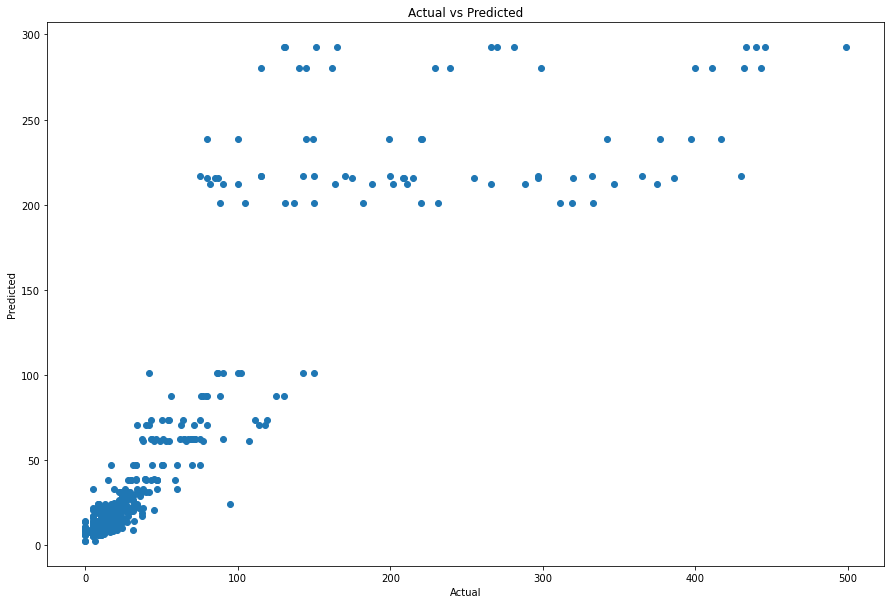

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(y,lst)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [11]:
from sklearn.metrics import r2_score
print("Random forest R^2 Score: %.2f"
      % r2_score(y, lst))

Random forest R^2 Score: 0.76
